In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

Dataset from https://oralytics.com/2020/02/24/irish-whiskey-distilleries-data-set/

In [6]:
Whiskey = gpd.read_file('Irish_Whiskey_Distilleries.csv')

In [7]:
Whiskey['LAT'] = pd.to_numeric(Whiskey['LAT'])
Whiskey['LONG'] = pd.to_numeric(Whiskey['LONG'])
Whiskey.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   DISTILLERY            45 non-null     object  
 1   COUNTY                45 non-null     object  
 2   ADDRESS               45 non-null     object  
 3   EIRCODE               45 non-null     object  
 4   NI_POSTCODE           45 non-null     object  
 5   TOURS                 45 non-null     object  
 6   WEB_SITE              45 non-null     object  
 7   TWITTER               45 non-null     object  
 8   LAT                   43 non-null     float64 
 9   LONG                  43 non-null     float64 
 10  NOTES_PARENT_COMPANY  45 non-null     object  
 11  geometry              0 non-null      geometry
dtypes: float64(2), geometry(1), object(9)
memory usage: 4.3+ KB


In [8]:
Whiskey.head()

,DISTILLERY,COUNTY,ADDRESS,EIRCODE,NI_POSTCODE,TOURS,WEB_SITE,TWITTER,LAT,LONG,NOTES_PARENT_COMPANY,geometry
0,Ballykeefe Distillery,Kilkenny,"Kyle, Ballykeefe, Cuffsgrange, County Kilkenny...",R95 NR50,,Yes,https://ballykeefedistillery.ie,@BallykeefeD,52.602034,-7.375774,Ging Family,None
1,Belfast Distillery,Antrim,"Crumlin Road Goal, Crumlin Road, Belfast, BT14...",,BT14 6ST,No,http://www.belfastdistillery.com,@BDCIreland,54.609718,-5.941994,J&J McConnell,None
2,Blacks Distillery,Cork,"Farm Lane, Kinsale, Co. Cork",P17 XW70,,No,https://www.blacksbrewery.com,@BlacksBrewery,51.710969,-8.515579,,None
3,Blackwater,Waterford,"Church Road, Ballinlevane East, Ballyduff, Co....",P51 C5C6,,No,https://blackwaterdistillery.ie/,@BlackDistillery,52.147581,-8.052973,,None
4,Boann,Louth,"Lagavooren, Platin Rd., Drogheda, Co. Louth, A...",A92 X593,,Yes,http://boanndistillery.ie/,@Boanndistillery,53.694590,-6.366558,Cooney Family,None


In [9]:
map=gpd.read_file('counties/counties.shp')

<AxesSubplot:xlabel='LONG', ylabel='LAT'>

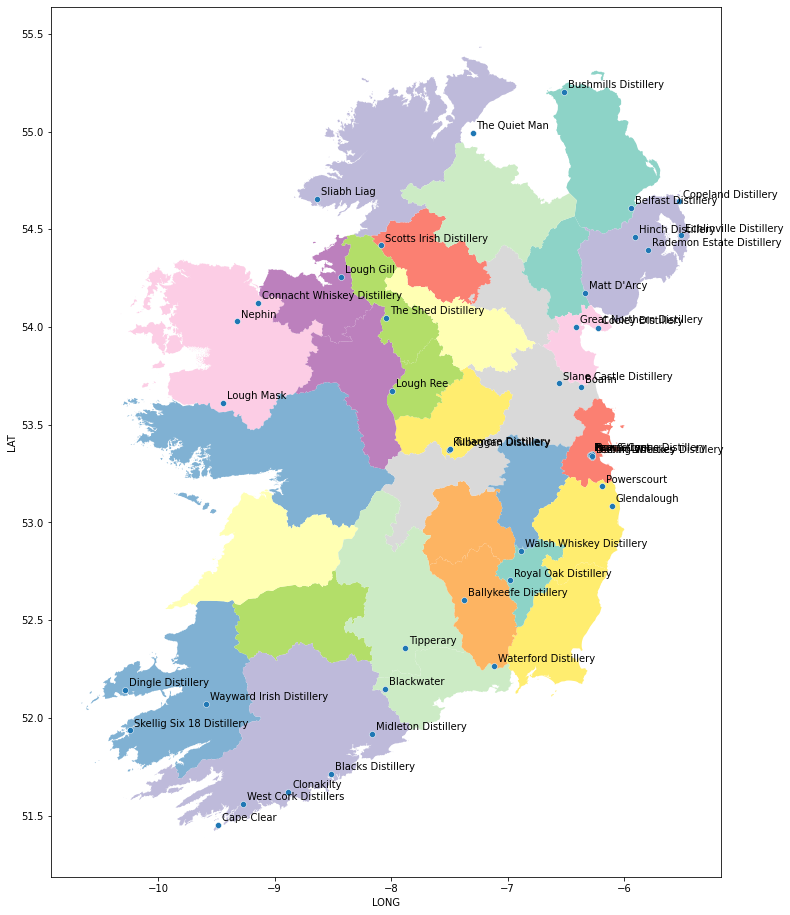

In [10]:
ax = map.plot(figsize=(16,16), column='NAME_EN', cmap='Set3')

for x, y, label in zip(Whiskey['LONG'], Whiskey['LAT'], Whiskey['DISTILLERY']):
    ax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

sns.scatterplot(data=Whiskey, x="LONG", y="LAT")